price 1.5
check A
0.75 0.75
check y0
0 -6.103515625e-05


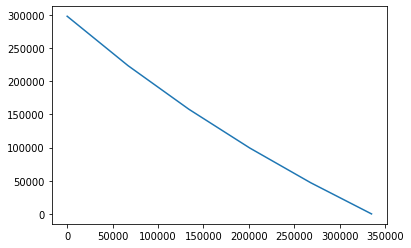

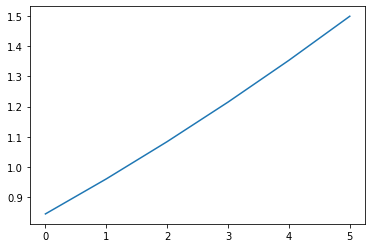

price 1.6
check A
0.75 0.75
check y0
0 -3.0517578125e-05


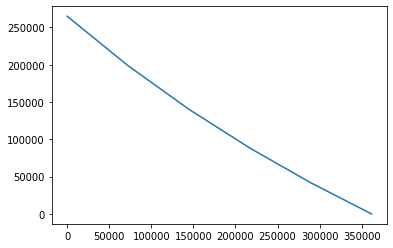

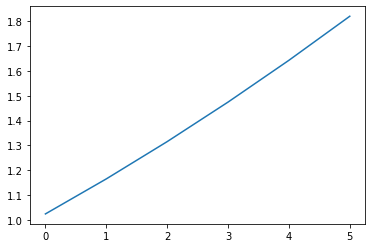

price 1.7
check A
0.75 0.75
check y0
0 3.0517578125e-05


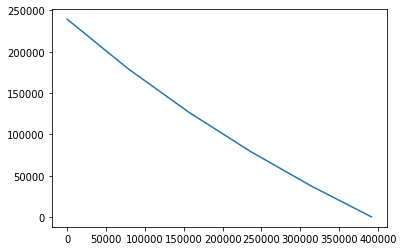

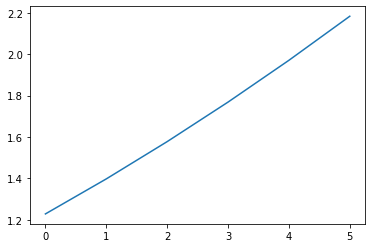

price 1.8
check A
0.75 0.75
check y0
0 0.0


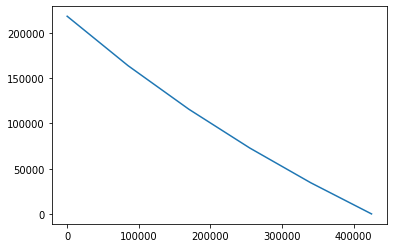

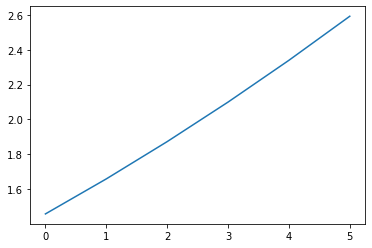

price 1.9
check A
0.75 0.75
check y0
0 -3.0517578125e-05


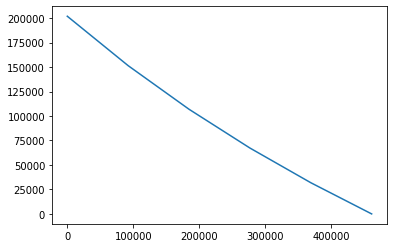

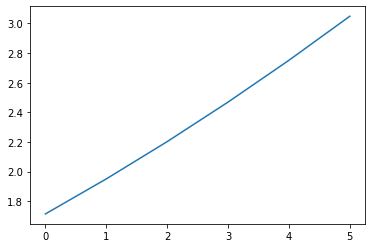

price 2.0
check A
0.75 0.75
check y0
0 0.0


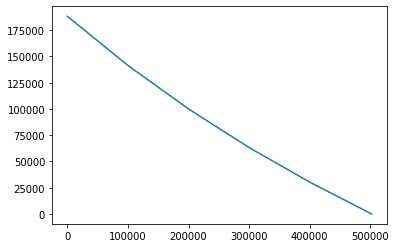

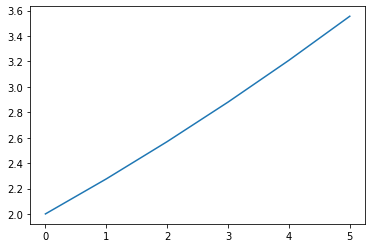

In [1]:
from llamma import get_A, solve_y0, xyk_out_given_in, xyk_spot_price, concentrated_xyk_out_given_in, concentrated_xyk_spot_price
import matplotlib.pyplot as plt

p = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

for price in p:
    
    print("price", price)
    
    p_up = 2.0
    p_down = 1.5
    # price = 1.8
    
    A = get_A(p_down, p_up)
    
    # check A
    print("check A")
    print(p_down / p_up, (A - 1)/A)
    
    x = 200000
    y = 100000
    
    y0 = solve_y0(x, y, price, p_up, A)
    
    # check y0
    print("check y0")
    term1 = price * A * y0**2 
    term2 = -y0*(p_up/price * (A-1) * x + price**2/p_up * A * y)
    term3 = -x*y
    print("0", term1 + term2 + term3)
    
    f = price**2 / p_up * A * y0
    # print("f", f)
    g = p_up / price * (A - 1) * y0
    # print("g", g)
    
    I = (x + f) * (y + g)
    
    x_max = I / g - f
    
    x_list = [x_max * i / 5 for i in range(6)]
    y_list = []
    
    prices = []
    
    y = y0
    x = I / (y + g) - f
    spot_price = concentrated_xyk_spot_price(x, y, f, g)
    
    for x in x_list:
        y = I / (x + f) - g
        spot_price = concentrated_xyk_spot_price(x, y, f, g)
        prices.append(spot_price)
        y_list.append(y)
        # print(x)
        # print("I", (x + f) * (y + g))
        # print("spot", spot_price)
        
    plt.plot(x_list, y_list)
    plt.show()

    plt.plot(prices)
    plt.show()
